### temporary setup after `make ssh`, `cdata`, and `make syncup`

```python
conda activate fastai2
mamba install cython dask scikit-image -y
pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"
pip install git+git://github.com/waspinator/pycococreator.git@0.2.0
pip -q install icedata
cd work
pip install -e . # install local ceruleanml package after deps installed with conda
conda deactivate
```

In [1]:
import ceruleanml.data as data
from pathlib import Path
import skimage.io as skio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from icevision.all import *
import icedata

ml_data_path = os.path.join(os.path.abspath(os.getcwd()),"../../data/cv2_transfer/outputs/skytruth_annotation/first_phase/")
path = Path(ml_data_path)
class_folders = list(path.glob("*/"))

In [31]:
class_map = {
    "Infrastructure": 1,
    "Natural Seep": 2,
    "Coincident Vessel": 3,
    "Recent Vessel": 4,
    "Old Vessel": 5,
    "Ambiguous": 6,
    "Hard Negatives": 0,
}

class_map

{'Infrastructure': 1,
 'Natural Seep': 2,
 'Coincident Vessel': 3,
 'Recent Vessel': 4,
 'Old Vessel': 5,
 'Ambiguous': 6,
 'Hard Negatives': 0}

In [2]:
parser = parsers.COCOMaskParser(annotations_filepath="../../data/cv2_transfer/instances_slicks_test_v2.json", img_dir="../../data/tiled_image_slicks_test_v2")

  0%|          | 0/487 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/487 [00:00<?, ?it/s]

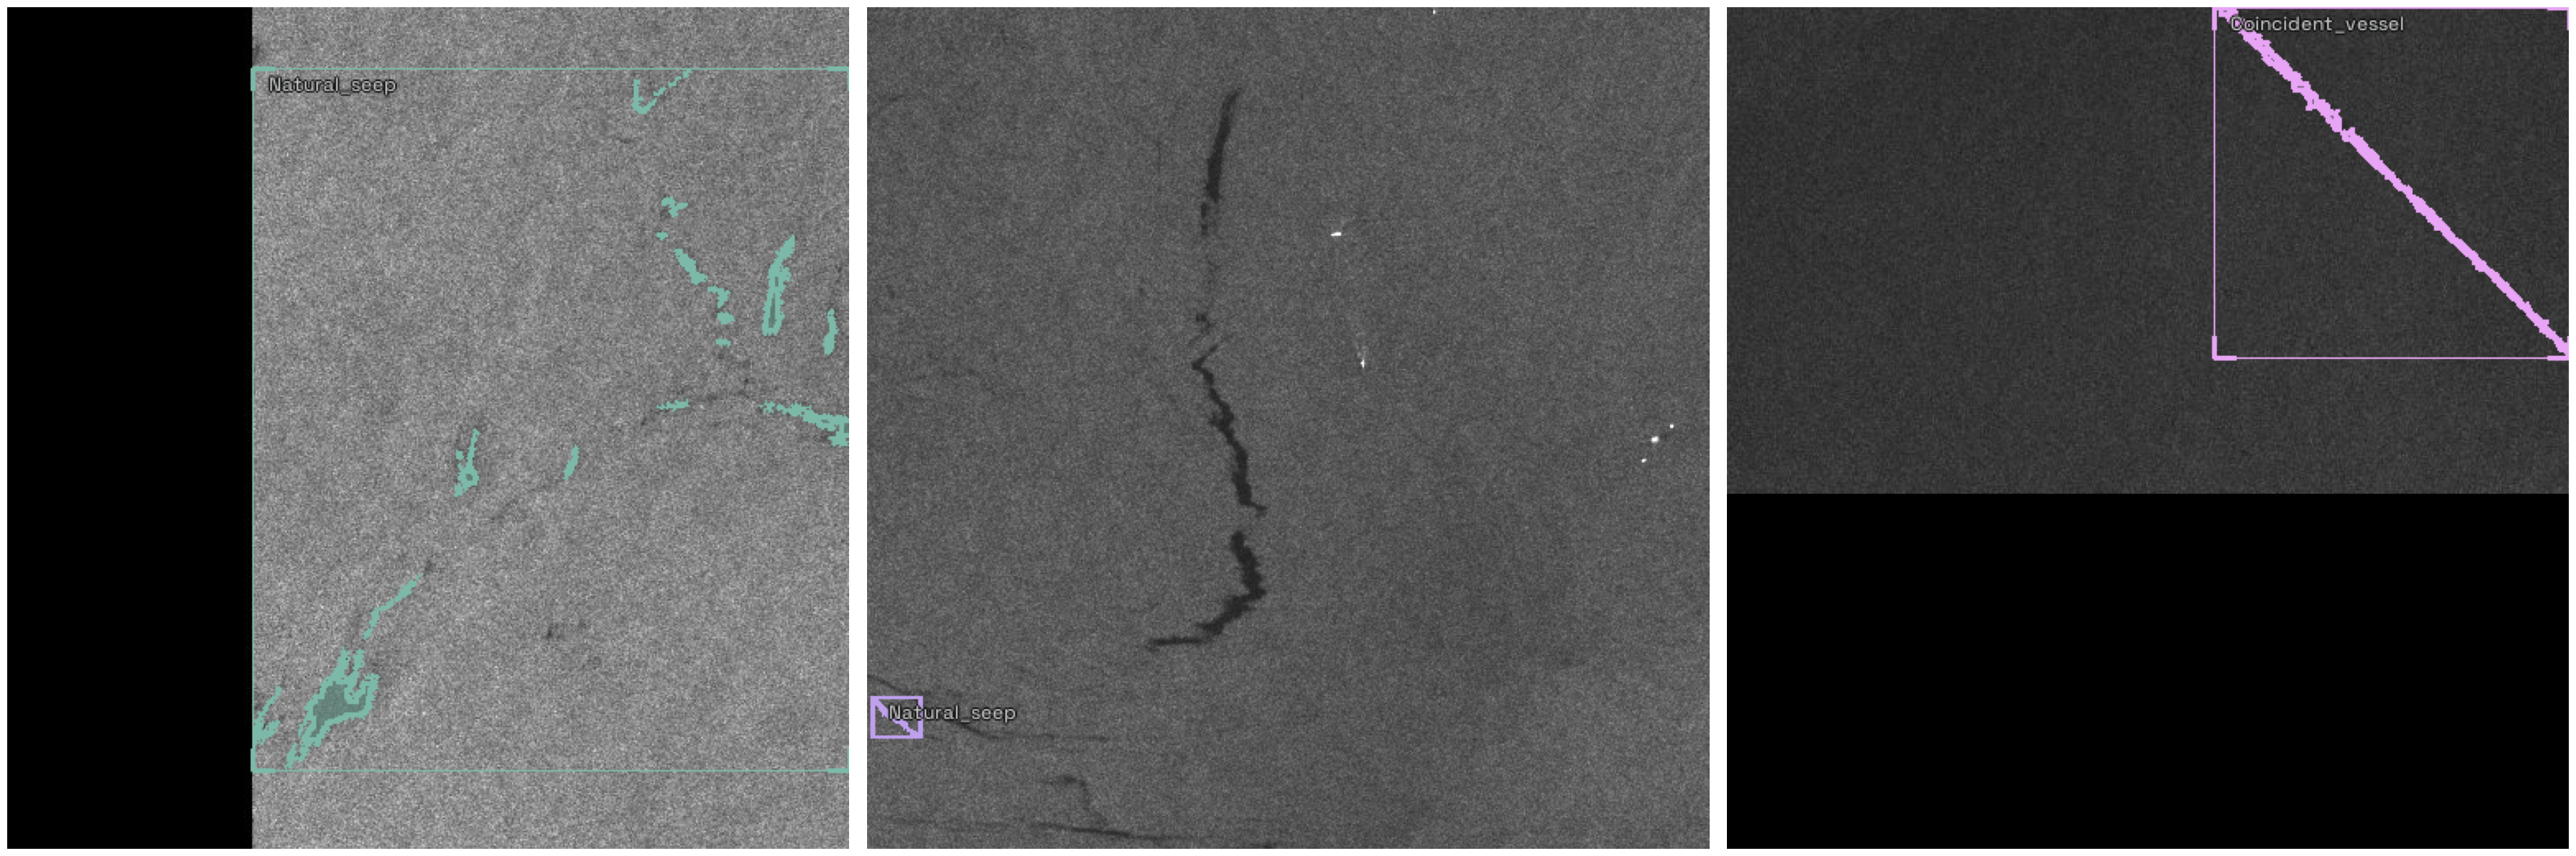

In [3]:
train_records, valid_records = parser.parse()
show_records(train_records[:3], ncols=3, class_map=class_map)

For some reason the middle record is not displaying annotated instances where there is a clear slick and it seems to be deisplaying the wrong or partial annotation in the lower left corner. I'm assuming this is an issue in coco creation or annotation export, not annotation creation.

In [8]:
train_records[:3][1]

BaseRecord

common: 
	- Record ID: 7853
	- Filepath: ../../data/tiled_image_slicks_test_v2/S1A_IW_GRDH_1SDV_20200908T000959_20200908T001024_034260_03FB43_BE01_vv-image_tile_29.png
	- Img: None
	- Image size ImgSize(width=512, height=512)
detection: 
	- BBoxes: [<BBox (xmin:3.0, ymin:419.0, xmax:32.0, ymax:444.0)>]
	- Is Crowds: [1]
	- Areas: [133]
	- Class Map: <ClassMap: {'background': 0, 'infra_slick': 1, 'natural_seep': 2, 'coincident_vessel': 3, 'recent_vessel': 4, 'old_vessel': 5, 'ambiguous': 6}>
	- Labels: [2]
	- masks: [<icevision.core.mask.RLE object at 0x7f1d9ae54c40>]
	- mask_array: None

In [ ]:
# https://github.com/airctic/icedata/blob/master/icedata/datasets/coco/parser.py
# > https://github.com/airctic/icevision/blob/master/icevision/parsers/coco_parser.py

In [8]:
ls {ml_data_path}

canonical_vessel/   instances_slick_train_v2.json  recent_vessel/
coincident_vessel/  natural_seep/
infrastructure/     old_vessel/


In [10]:
ls {ml_data_path}/canonical_vessel/S1A_IW_GRDH_1SDV_20200729T034859_20200729T034924_033664_03E6D3_93EF

Background.png  ambiguous_1.png  vessel_coincident_1.png  vessel_old_1.png


In [ ]:
#cat {ml_data_path}/instances_slick_train_v2.json

In [40]:
img = mpimg.imread(f'{ml_data_path}/canonical_vessel/S1A_IW_GRDH_1SDV_20200729T034859_20200729T034924_033664_03E6D3_93EF/ambiguous_1.png')

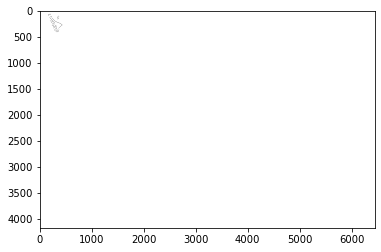

In [41]:
plt.imshow(img)